
__(*) Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции numpy.linalg.svd()__

In [3]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [11]:
# Загрузим игрушечный датасет из sklearn
iris = datasets.load_iris()
X = iris.data
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [27]:
# Для начала отмасштабируем выборку
X_ = X.astype(float)

rows, cols = X_.shape

# центрирование - вычитание из каждого значения среднего по строке
means = X_.mean(0)
for i in range(rows):
    for j in range(cols):
        X_[i, j] -= means[j]

# деление каждого значения на стандартное отклонение
std = np.std(X_, axis=0)
for i in range(cols):
    for j in range(rows):
        X_[j][i] /= std[i]

# Найдем собственные векторы и собственные значения
covariance_matrix = X_.T.dot(X_)
eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# сформируем список кортежей (собственное значение, собственный вектор)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

# и отсортируем список по убыванию собственных значений
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Собственные значения в порядке убывания:')
for i in eig_pairs:
    print(f' val:{i[0]}, vect:{i[1]}')        

Собственные значения в порядке убывания:
 val:437.7746724797991, vect:[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 val:137.1045707202105, vect:[-0.37741762 -0.92329566 -0.02449161 -0.06694199]
 val:22.0135313356972, vect:[-0.71956635  0.24438178  0.14212637  0.63427274]
 val:3.1072254642928656, vect:[ 0.26128628 -0.12350962 -0.80144925  0.52359713]


In [13]:
# Оценим долю дисперсии, которая описывается найденными компонентами.
eig_sum = sum(eig_values)
var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описвыаемая каждой из компонент \n{var_exp}')

# а теперя оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описвыаемая каждой из компонент 
[72.9624454132999, 22.850761786701764, 3.6689218892828688, 0.517870910715478]
Кумулятивная доля дисперсии по компонентам 
[ 72.96244541  95.8132072   99.48212909 100.        ]


In [14]:
# Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


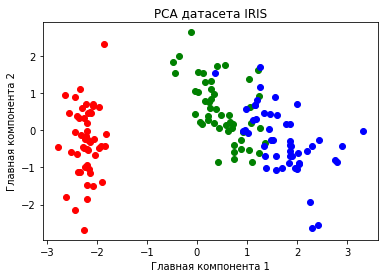

In [15]:
# Сформируем новую матрицу "объекты-признаки"
Z = X_.dot(W)

plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y==i, 0], Z[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

In [66]:
# Написать свою реализацию метода главных компонент с помощью сингулярного разложения 
# с использованием функции numpy.linalg.svd()
def user_pca_get_W(X, n_components=None):
    uX = X.astype(float)
    X_std = (uX - np.mean(uX, axis=0))/np.std(uX, axis=0)    
    U, D, V_t = np.linalg.svd(X_std)
    W = V_t.T[:,:n_components]
    return W

user_W:[[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


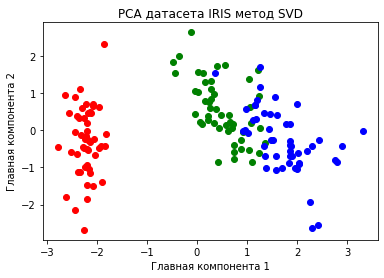

In [67]:
# Сформируем новую матрицу "объекты-признаки"
user_W = user_pca_get_W(X_, n_components=2)
print(f'user_W:{user_W}')
user_Z = X_.dot(user_W)
#print(f'Метод SVD, матрица весов W:\n', user_W)

plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(user_Z[y==i, 0], user_Z[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS метод SVD')
plt.show()

__(*) Обучить любую модель классификации на датасете IRIS до применения PCA и после него. Сравнить качество классификации по отложенной выборке.__

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score

In [37]:
# Загрузим игрушечный датасет из sklearn
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_pca = PCA(n_components=2, random_state=42).fit_transform(X)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.25)

In [38]:
clf = RFC(n_jobs=-1).fit(X_train, y_train)
clf_pca = RFC(n_jobs=-1).fit(X_train_pca, y_train_pca)

In [39]:
print(f"До применения PCA F1-score: {f1_score(y_test, clf.predict(X_test), average='micro')}")
print(f"После применения PCA F1-score: {f1_score(y_test_pca, clf_pca.predict(X_test_pca), average='micro')}")

До применения PCA F1-score: 0.9473684210526315
После применения PCA F1-score: 0.9736842105263158


__(*) Принять участие в одном или двух соревнованиях и прислать свой псевдоним на Kaggle и ссылку на github с решением задачи.__<br>
Ссылки на соревнование на kaggle - это наш курсовой проект в этом курсе, он опционален, не является обязательным. На выбор есть 2 задачи:<br>
https://www.kaggle.com/c/tutors-expected-math-exam-results) - предсказание среднего балла на ЕГЭ по математике, задача регрессии<br>
https://www.kaggle.com/c/choose-tutors - предсказание вероятности того, что репетитор подходит студенту, задача бинарной классификации<br>
Можно начинать ознакамливаться с задачами и начинать решать. При решении запрещены любые импорты / зависимости, кроме следующих:<br>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns